In [8]:
import pickle
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
with open("../data/processed/ant_behavioral_train_test.pkl", "rb") as f:
    data = pickle.load(f)

X_train, X_test, y_train, y_test = data["X_train"], data["X_test"], data["y_train"], data["y_test"]

In [19]:
xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# Predictions
y_pred_train = xgb.predict(X_train)
y_pred_test  = xgb.predict(X_test)

# Evaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.3f}")
print(f"Test  R²: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Train R²: 0.231, RMSE: 0.873
Test  R²: 0.190, RMSE: 0.907


,Feature,Importance
0,trial_type_Incongruent,0.331310
2,prev_trial_type_SpatialCue,0.228705
1,prev_trial_type_NoCue,0.072059
10,run_6,0.048442
8,run_4,0.046812
7,run_3,0.046238
9,run_5,0.041998
6,run_2,0.041661
3,target_dir_Right,0.037962
4,target_pos_Up,0.037465


/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_92835/3871725216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), y="Feature", x="Importance", palette="viridis")


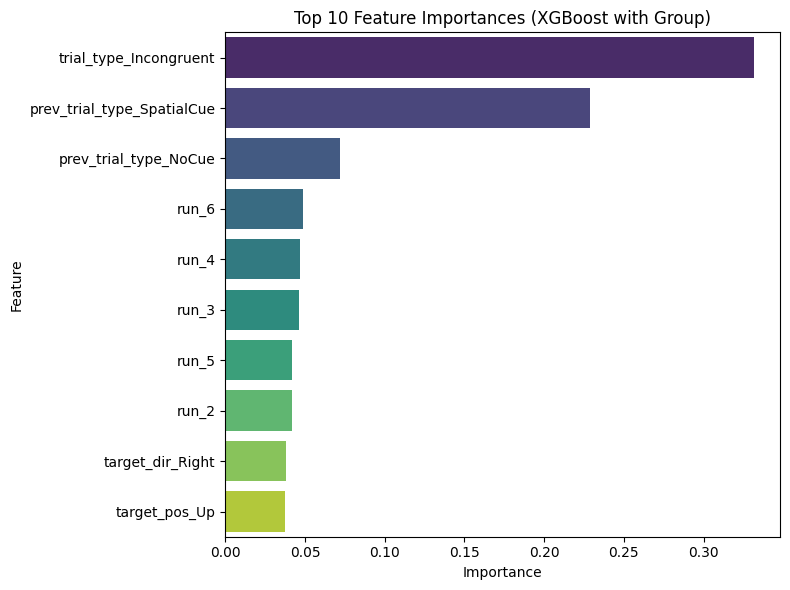

In [20]:
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(feat_imp.head(10))

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(10), y="Feature", x="Importance", palette="viridis")
plt.title("Top 10 Feature Importances (XGBoost with Group)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

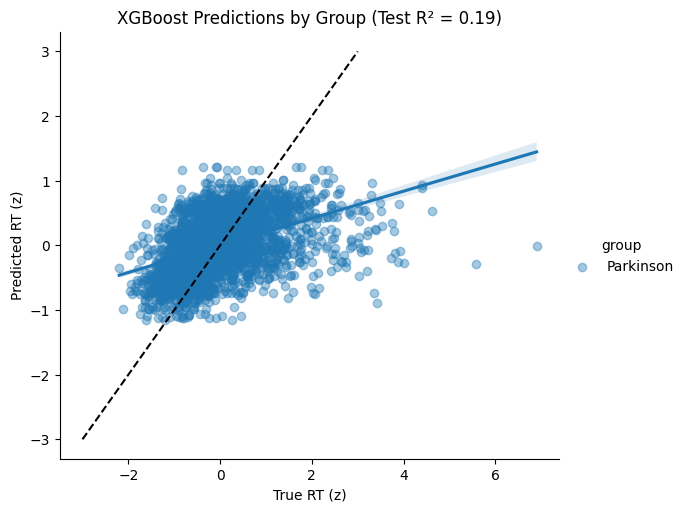

In [17]:
pred_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred_test
})
# Extract group labels for test subjects
pred_df["group"] = X_test.filter(like="group_").idxmax(axis=1).str.replace("group_","")

sns.lmplot(
    data=pred_df, x="y_true", y="y_pred",
    hue="group", height=5, aspect=1.2,
    scatter_kws={"alpha":0.4}
)
plt.plot([-3,3], [-3,3], "k--")
plt.title(f"XGBoost Predictions by Group (Test R² = {r2_test:.2f})")
plt.xlabel("True RT (z)")
plt.ylabel("Predicted RT (z)")
plt.show()